<a href="https://colab.research.google.com/github/Tenntucky/DS-Unit-2-Linear-Models/blob/master/module2-regression-2/Kole_Goldsberry_assignment_regression_classification_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 2*

---

# Regression 2

## Assignment

You'll continue to **predict how much it costs to rent an apartment in NYC,** using the dataset from renthop.com.

- [ ] Do train/test split. Use data from April & May 2016 to train. Use data from June 2016 to test.
- [ ] Engineer at least two new features. (See below for explanation & ideas.)
- [ ] Fit a linear regression model with at least two features.
- [ ] Get the model's coefficients and intercept.
- [ ] Get regression metrics RMSE, MAE, and $R^2$, for both the train and test data.
- [ ] What's the best test MAE you can get? Share your score and features used with your cohort on Slack!
- [ ] As always, commit your notebook to your fork of the GitHub repo.


#### [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)

> "Some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used." — Pedro Domingos, ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)

> "Coming up with features is difficult, time-consuming, requires expert knowledge. 'Applied machine learning' is basically feature engineering." — Andrew Ng, [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf) 

> Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. 

#### Feature Ideas
- Does the apartment have a description?
- How long is the description?
- How many total perks does each apartment have?
- Are cats _or_ dogs allowed?
- Are cats _and_ dogs allowed?
- Total number of rooms (beds + baths)
- Ratio of beds to baths
- What's the neighborhood, based on address or latitude & longitude?

## Stretch Goals
- [ ] If you want more math, skim [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf),  Chapter 3.1, Simple Linear Regression, & Chapter 3.2, Multiple Linear Regression
- [ ] If you want more introduction, watch [Brandon Foltz, Statistics 101: Simple Linear Regression](https://www.youtube.com/watch?v=ZkjP5RJLQF4)
(20 minutes, over 1 million views)
- [ ] Add your own stretch goal(s) !

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
import numpy as np
import pandas as pd

# Read New York City apartment rental listing data
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

# Remove the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
        (df['price'] <= np.percentile(df['price'], 99.5)) & 
        (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
        (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
        (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
        (df['longitude'] <= np.percentile(df['longitude'], 99.95))]

In [0]:
df['rooms'] = df['bathrooms'] + df['bedrooms']

In [130]:
df.head(1)

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space,month,rooms
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,4.5


In [0]:
from datetime import datetime
from dateutil.parser import parse

df['created'] = pd.to_datetime(df['created'])

In [0]:
df['month'] = df['created'].dt.month

In [0]:
train = df[df['month'].isin([4,5])]
test = df[df['month'].isin([6])]

In [134]:
print(train.shape, test.shape)

(31844, 36) (16973, 36)


In [135]:
from sklearn.metrics import mean_absolute_error

target = 'price'
y_train = train[target]
y_test = test[target]

print('Mean Baseline (using 0 features)')
guess = y_train.mean()

y_pred = [guess] * len(y_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'Train Error (April-May Rent): {mae:.2f} dollars.')

y_pred = [guess] * len(y_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Test Error (June Rent): {mae:.2f} dollars.')

Mean Baseline (using 0 features)
Train Error (April-May Rent): 1201.88 dollars.
Test Error (June Rent): 1197.71 dollars.


In [136]:
import plotly.express as px

px.scatter(
    train,
    x = 'bathrooms',
    y = 'price',
    text = 'month',
    title = 'Price of Bathrooms',
    trendline='ols', # ordinary least squares
)

In [137]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

features = ['bathrooms']
X_train = train[features]
X_test = test[features]
print(f'Linear regression, dependent on: {features}')

model.fit(X_train, y_train)
y_pred = model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'Train error: {mae:.2f} dollars')

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Test error: {mae:.2f} dollars')

Linear regression, dependent on: ['bathrooms']
Train error: 887.40 dollars
Test error: 890.46 dollars


In [124]:
model.coef_, model.intercept_

(array([2551.69752546]), 504.055404559454)

In [139]:
px.scatter_3d(
    train,
    x = 'bathrooms',
    y = 'price',
    z = 'bedrooms',
    text = 'month',
    title = 'Price of bathrooms and bedrooms',
)

In [140]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled

array([[-0.43122414],
       [-0.43122414],
       [-0.43122414],
       ...,
       [-0.43122414],
       [-0.43122414],
       [-0.43122414]])

In [141]:
from sklearn.preprocessing import StandardScaler

features = ['rooms', 'dishwasher']
print(f'Linear Regression, dependent on: {features}')
X_train = train[features]
X_test = test[features]

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, y_train)
y_pred_train = model.predict(X_train_scaled)
mae_train = mean_absolute_error(y_train, y_pred_train)
print(f'Train error: {mae:.2f} price.')

y_pred_test = model.predict(X_test_scaled)
mae_test = mean_absolute_error(y_test, y_pred_test)
print(f'Test error: {mae:.2f} price.')

Linear Regression, dependent on: ['rooms', 'dishwasher']
Train error: 890.46 price.
Test error: 890.46 price.


In [0]:
import itertools
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression

def regression_3d(df, x, y, z, num=100, **kwargs):
  
  fig = px.scatter_3d(df, x, y, z, **kwargs)

  features = [x, y]
  target = z
  model = LinearRegression()
  model.fit(df[features], df[target])

  xmin, xmax = df[x].min(), df[x].max()
  ymin, ymax = df[y].min(), df[y].max()
  xcoords = np.linspace(xmin, xmax, num)
  ycoords = np.linspace(ymin, ymax, num)
  coords = list(itertools.product(xcoords, ycoords))

  predictions = model.predict(coords)
  Z = predictions.reshape(num, num).T

  fig.add_trace(go.Surface(x=xcoords, y=ycoords, z=Z))

  return fig

In [144]:
regression_3d(
    train,
    x='rooms',
    y='dishwasher',
    z='price',
    text='month',
    title='Cost to rent dependent on rooms and dishwasher.'
)
# I haven't had a dishwasher in 9 years! 

In [145]:
model.coef_, model.intercept_

(array([1106.85572099,  201.32680754]), 3575.604007034292)

In [146]:
# After being scaled
model.coef_, model.intercept_
# Go up a few and re run data before scaling

(array([1106.85572099,  201.32680754]), 3575.604007034292)

In [147]:
beta0 = model.intercept_
beta1, beta2 = model.coef_
print(f'y = {beta0} + {beta1}x1 + {beta2}x2')

y = 3575.604007034292 + 1106.855720987839x1 + 201.32680753782046x2


In [148]:
print('Intercept', model.intercept_)
coefficients = pd.Series(model.coef_, features)
print(coefficients.to_string())

Intercept 3575.604007034292
rooms         1106.855721
dishwasher     201.326808


In [0]:
def model_predictions(bathrooms, bedrooms):
  prediction_0 = model.predict([[bathrooms, bedrooms]])
  bathrooms += 1
  prediction_1 = model.predict([[bathrooms, bedrooms]])
  difference = prediction_1 - prediction_0
  return prediction_0, prediction_1, difference

In [151]:
zero_zero = model_predictions(0, 0)
print(zero_zero)

(array([3575.60400703]), array([4682.45972802]), array([1106.85572099]))


In [0]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def squared_errors(df, feature, target, m, b):

  fig = plt.figure(figsize=(7,7))
  ax = plt.axes()
  df.plot.scatter(feature, target, ax=ax)

  x = df[feature]
  y = df[target]
  y_pred = m*x + b

  ax.plot(x, y_pred)

  xmin, xmax = ax.get_xlim()
  ymin, ymax = ax.get_ylim()
  scale = (xmax-xmin)/(ymax-ymin)
  for x, y1, y2 in zip(x, y, y_pred):
    bottom_left = (x, min(y1, y2))
    height = abs(y1 - y2)
    width = height * scale 
    ax.add_patch(Rectangle(xy=bottom_left, width=width, height=height, alpha=0.1))

  mse = mean_squared_error(y, y_pred)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y, y_pred)
  r2 = r2_score(y, y_pred)
  print('Mean Squared Error:', mse)
  print('Root Mean Squared Error:', rmse)
  print('Mean Absolute Error:', mae)
  print('R^2:', r2)

Mean Squared Error: 3105028.217891242
Root Mean Squared Error: 1762.1090255404863
Mean Absolute Error: 1201.8811133682555
R^2: 0.0


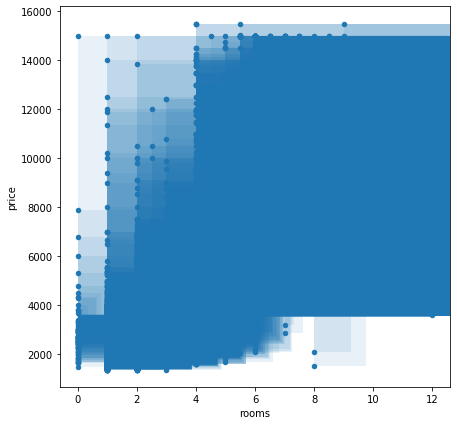

In [158]:
feature = 'rooms'
squared_errors(train, feature, target, m=0, b=y_train.mean())

In [155]:
def add_constant(X):
    constant = np.ones(shape=(len(X),1))
    return np.hstack((constant, X))
X = add_constant(train[features].values)
print('X')
print(X)

y = train[target].values[:, np.newaxis]
print('y')
print(y)

X_transpose = X.T
X_transpose_X = X_transpose @ X
X_transpose_X_inverse = np.linalg.inv(X_transpose_X)
X_transpose_y = X_transpose @ y
beta_hat = X_transpose_X_inverse @ X_transpose_y

print('Beta Hat')
print(beta_hat)

X
[[1. 2. 1.]
 [1. 2. 0.]
 [1. 5. 0.]
 ...
 [1. 2. 0.]
 [1. 1. 0.]
 [1. 3. 0.]]
y
[[2850]
 [3275]
 [3350]
 ...
 [2595]
 [3350]
 [2200]]
Beta Hat
[[1263.03648577]
 [ 783.91224728]
 [ 408.0890097 ]]


In [156]:
model.intercept_, model.coef_

(3575.604007034292, array([1106.85572099,  201.32680754]))